# (12) vH16 — ```mlp```, **not** whitened

**Motivation**: host = ```any```, device = ```cuda:1``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from analysis.chosen import *
from figures.analysis import *
from figures.imgs import plot_weights

device_idx = 2
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:2  ———  host: mach

## vH16

Intermediate beta: $(T, \beta) = (16, 6.0)$

In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|lin')

seq_len = 16
cfg_vae['seq_len'] = seq_len

cfg_tr['kl_beta'] = 3/8 * seq_len

# not whitened:
cfg_tr['file_name'] = 'patches.npy'

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.n_iters

poisson_vH16_t-16_z-[512]_<jacob|lin>
b200-ep300-lr(0.002)_beta(6:0x0.1)_temp(0.05:lin-0.5)_gr(200)_(2024_10_12,07:26)

154500

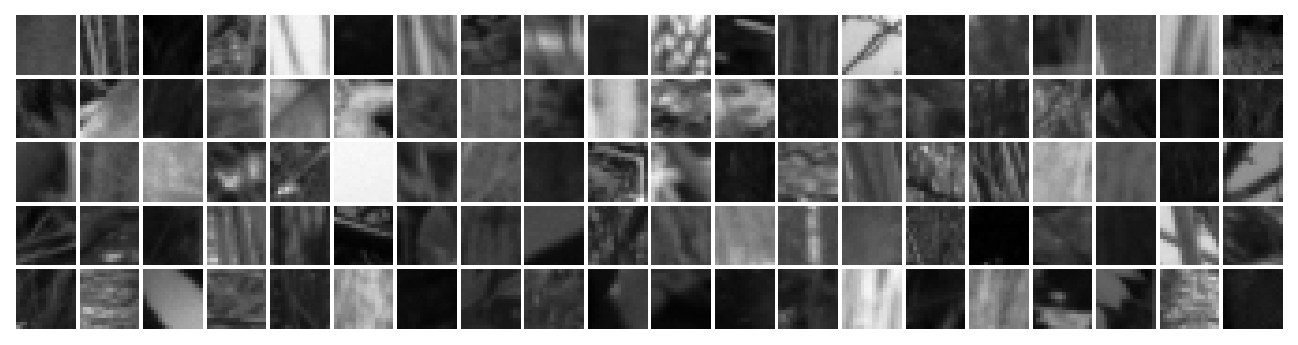

In [5]:
_ = plot_weights(tr.dl_vld.dataset.tensors[0][:100], nrows=5, method='none')

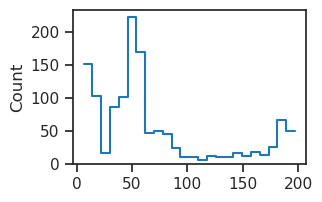

In [6]:
_ = histplot(tr.dl_vld.dataset.tensors[0][:5].ravel())

In [ ]:
tr.train()

  0%|                                                   | 0/300 [00:00<?, ?it/s]

In [ ]:
log_rate = tonp(tr.model.layer.log_rate.squeeze())
histplot(log_rate, color='b')

In [ ]:
w = tr.model.layer.get_weight()
norms = tonp(torch.linalg.vector_norm(w, dim=1))

_ = tr.model.show(order=np.argsort(norms))

histplot(np.log(norms), label='log norm', color='b')